# Problem Statement:
Please find below a problem statement for you to solve in the next 5 business days to take your candidature forward.

This data contains power for multiple ACs at some hotel in Gurgaon.

Identify patterns/trends in the data?
Which AC was used the most/least?
Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?
Using the power data, predict/forecast the power consumption?
This problem is open-ended for exploration analysis. Feel free to provide any insights from the data by loading the data using Python Pandas library. The more insights you get, the better.


In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from tqdm import tqdm_notebook
from scipy.optimize import minimize              # for function minimization
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from dateutil.parser import parse 
plt.rcParams.update({'figure.figsize': (16, 8), 'figure.dpi': 120})
%matplotlib inline

## Import Libraries

In [ ]:
ac = pd.read_csv(r'C:\\Users\\arjun\\CONTESTS\\ZENATIX\\AC_Data.csv',parse_dates=['0'])
ac.head()

0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0 2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
1 2019-08-01 00:01:00       NaN       NaN   NaN   NaN       NaN       NaN   
2 2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
3 2019-08-01 00:03:00       NaN       NaN   NaN   NaN       NaN       NaN   
4 2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6.735981  
1       NaN       NaN       NaN       NaN       NaN  
2  2.720484  3.302422  3.986483  3.220588  6.379500  
3       NaN       NaN       NaN       NaN       NaN  
4  2.676861  3.539026  3.797881  3.131560  6.363475

## Exploratory Data Analysis

In [ ]:
print("Percentage of missing observations for each variable :\n", ac.isnull().sum()*100/ac.shape[0])

Percentage of missing observations for each variable :
 0         0.000000
AC 1     50.241348
AC 2     50.237933
AC 3     50.235656
AC 4     50.245902
AC 5     50.232240
AC 6     50.231102
AC 7     50.274362
AC 8     50.245902
AC 9     50.302823
AC 10    50.261840
AC 11    50.284608
AC 12    50.235656
AC 13    50.228825
AC 14    50.255009
AC 15    50.233379
AC 16    50.239071
AC 17    50.234517
AC 18    50.224271
dtype: float64


# Observation:
### Almost 50% of each of the variables have missing values

In [ ]:
ac_sum =pd.DataFrame(ac.sum())
ac_sum['AC_type']= ac_sum.index
ac_sum.head()

0 AC_type
AC 1  103997.423000    AC 1
AC 2  169113.147946    AC 2
AC 3  112272.957042    AC 3
AC 4  104678.005269    AC 4
AC 5   62151.007653    AC 5

In [ ]:

ac_sum.columns=["power_sum","AC_type"]
ac_sum.columns

Index(['power_sum', 'AC_type'], dtype='object')

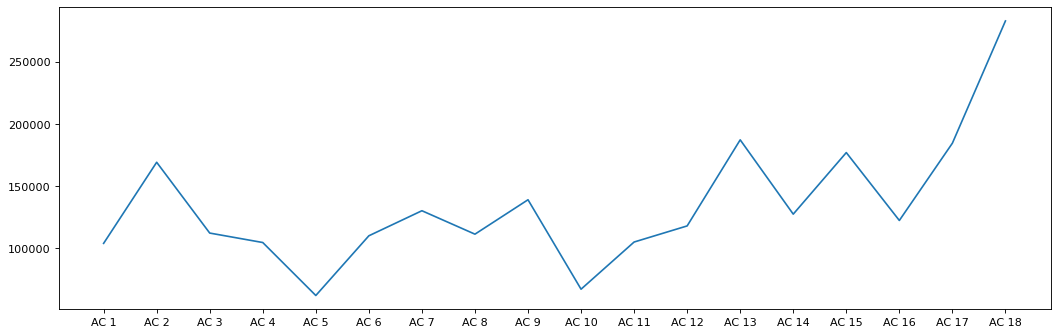

In [ ]:
figure(figsize=(16, 5), dpi=80)
plt.plot(ac_sum.AC_type,ac_sum.power_sum)

plt.show()

## Findings:
The Ac that is most used is 'AC 18' with 282567.569146 as total unit consumed.

The Ac that is least used in 'AC 5' with 62151.007653	as total unit consumed.

In [ ]:
ac_clean =ac.dropna(axis=0, how='all',subset=['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8',
       'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16',
       'AC 17', 'AC 18'])
print(ac_clean.shape)
ac_clean.isnull().sum()

(51979, 19)


0           0
AC 1     8271
AC 2     8268
AC 3     8266
AC 4     8275
AC 5     8263
AC 6     8262
AC 7     8300
AC 8     8275
AC 9     8325
AC 10    8289
AC 11    8309
AC 12    8266
AC 13    8260
AC 14    8283
AC 15    8264
AC 16    8269
AC 17    8265
AC 18    8256
dtype: int64

In [ ]:
ac['0'].apply(lambda x: str(x).split(" ")[0])

0        2019-08-01
1        2019-08-01
2        2019-08-01
3        2019-08-01
4        2019-08-01
            ...    
87835    2019-09-30
87836    2019-09-30
87837    2019-09-30
87838    2019-09-30
87839    2019-09-30
Name: 0, Length: 87840, dtype: object

In [ ]:
ac_clean['date']= ac['0'].apply(lambda x: str(x).split(" ")[0])
print(ac_clean.shape)
ac_clean.head()

(51979, 20)


0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0 2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
2 2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
4 2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   
6 2019-08-01 00:06:00  6.665446  9.065626   0.0   0.0  2.575639  3.772891   
8 2019-08-01 00:08:00  6.674838  9.096130   0.0   0.0  2.021472  3.155697   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   
6  2.596200  5.805132  3.553778  1.878356  2.737645  2.510972  3.090007   
8  2.845417  6.315060  3.042244  1.914650  2.452500  2.171791  3.097202   

      AC 14     AC 15     AC 16     AC 17     AC 18        date  
0  2.749470  5.417774  4.113460  3.305072  6.735981  2019-08-01  
2  2.720484  3.302422  3.986483  3.220588  6.379500  2019-08-01  
4  2.676861  3.539026  3.797881  3.131560  6.363475  2019-08-01  
6  2.666604  4.607439  3.062610  3.063953  6.127366  2019-08-01  
8  2.710572  5.332696  2.640150  2.864680  5.662474  2019-08-01

In [ ]:
ac_clean.rename(columns = {'0':'Datetime'}, inplace = True)
ac_clean.head(2)

Datetime      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0 2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
2 2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   

      AC 14     AC 15     AC 16     AC 17     AC 18        date  
0  2.749470  5.417774  4.113460  3.305072  6.735981  2019-08-01  
2  2.720484  3.302422  3.986483  3.220588  6.379500  2019-08-01

In [ ]:
ac_clean['total_consumption'] =np.nansum(ac_clean.loc[:,['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5',
       'AC 6', 'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13',
       'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18']],axis=1)
ac_clean.head(2)

Datetime      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0 2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
2 2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   

       AC 7      AC 8      AC 9  ...     AC 11     AC 12     AC 13     AC 14  \
0  2.782276  4.624447  5.222060  ...  1.585072  0.560373  3.142941  2.749470   
2  2.529366  5.057423  5.349465  ...  2.168184  1.818730  3.085110  2.720484   

      AC 15     AC 16     AC 17     AC 18        date total_consumption  
0  5.417774  4.113460  3.305072  6.735981  2019-08-01         65.393197  
2  3.302422  3.986483  3.220588  6.379500  2019-08-01         64.762056  

[2 rows x 21 columns]

In [ ]:
ac_clean=ac_clean.loc[:,['Datetime','date','total_consumption']] 
ac_clean.head()

Datetime        date  total_consumption
0 2019-08-01 00:00:00  2019-08-01          65.393197
2 2019-08-01 00:02:00  2019-08-01          64.762056
4 2019-08-01 00:04:00  2019-08-01          65.791277
6 2019-08-01 00:06:00  2019-08-01          63.779666
8 2019-08-01 00:08:00  2019-08-01          61.997570

In [ ]:
ac_clean.to_csv(r'C:\\Users\\arjun\\CONTESTS\\ZENATIX\\AC_Data_clean_date_included.csv')


In [ ]:
ac_clean.head()

Datetime        date  total_consumption
0 2019-08-01 00:00:00  2019-08-01          65.393197
2 2019-08-01 00:02:00  2019-08-01          64.762056
4 2019-08-01 00:04:00  2019-08-01          65.791277
6 2019-08-01 00:06:00  2019-08-01          63.779666
8 2019-08-01 00:08:00  2019-08-01          61.997570

### Import the temperature data. 
The temp data was obtained from a free subscription from the website https://solcast.com/
for a particular location around Gurgaon,Haryana. Since the exact location is not known the temperature data may differ from the actual temperature experienced by the consumers of AC thus reducing our model performance.

In [ ]:
ws = pd.read_csv('haryana_jbm_ws_inerpolated.csv',parse_dates=['Datetime'],index_col= [0])
print(ws.info())
ws.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87840 entries, 1 to 1440
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  87840 non-null  datetime64[ns]
 1   temp      87840 non-null  float64       
 2   date      87840 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.7+ MB
None


Datetime       temp        date
index1                                           
1      2019-08-01 00:00:00  28.700000  2019-08-01
2      2019-08-01 00:01:00  28.693333  2019-08-01
3      2019-08-01 00:02:00  28.686667  2019-08-01
4      2019-08-01 00:03:00  28.680000  2019-08-01
5      2019-08-01 00:04:00  28.673333  2019-08-01

In [ ]:
acd = pd.read_csv('AC_Data_clean_date_included.csv',parse_dates=['Datetime'],index_col= [0])
print(acd.info())
acd.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51979 entries, 0 to 87839
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           51979 non-null  datetime64[ns]
 1   date               51979 non-null  object        
 2   total_consumption  51979 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.6+ MB
None


Datetime        date  total_consumption
0 2019-08-01 00:00:00  2019-08-01          65.393197
2 2019-08-01 00:02:00  2019-08-01          64.762056
4 2019-08-01 00:04:00  2019-08-01          65.791277
6 2019-08-01 00:06:00  2019-08-01          63.779666
8 2019-08-01 00:08:00  2019-08-01          61.997570

### Merge the power consumption and temp dataframes

In [ ]:
merged_df = pd.merge(left = ws,right = acd,left_on=['Datetime','date'],right_on = ['Datetime','date'])
print(merged_df.shape)
merged_df.head()

(51979, 4)


Datetime       temp        date  total_consumption
0 2019-08-01 00:00:00  28.700000  2019-08-01          65.393197
1 2019-08-01 00:02:00  28.686667  2019-08-01          64.762056
2 2019-08-01 00:04:00  28.673333  2019-08-01          65.791277
3 2019-08-01 00:06:00  28.660000  2019-08-01          63.779666
4 2019-08-01 00:08:00  28.646667  2019-08-01          61.997570

### Write and save the preprocessed data for reuse purpose

In [ ]:
merged_df.to_csv(r'C:\\Users\\arjun\\CONTESTS\\ZENATIX\\merged_df.csv')

## Import the AC dataset

In [2]:
from google.colab import files
files.upload()

Saving merged_df.csv to merged_df.csv


{'merged_df.csv': b',Datetime,date,temp,total_consumption\r\n0,2019-08-01 00:00:00,2019-08-01,28.7,65.39319683837999\r\n1,2019-08-01 00:02:00,2019-08-01,28.6866666666667,64.76205639649\r\n2,2019-08-01 00:04:00,2019-08-01,28.6733333333333,65.7912770996\r\n3,2019-08-01 00:06:00,2019-08-01,28.66,63.77966625977001\r\n4,2019-08-01 00:08:00,2019-08-01,28.6466666666667,61.99756982421\r\n5,2019-08-01 00:10:00,2019-08-01,28.6333333333333,64.18041418458301\r\n6,2019-08-01 00:12:00,2019-08-01,28.62,66.17471874998\r\n7,2019-08-01 00:14:00,2019-08-01,28.6066666666667,69.10315881344998\r\n8,2019-08-01 00:16:00,2019-08-01,28.5933333333333,66.905701416024\r\n9,2019-08-01 00:18:00,2019-08-01,28.58,73.8335477295\r\n10,2019-08-01 00:20:00,2019-08-01,28.5666666666667,73.42148681641\r\n11,2019-08-01 00:22:00,2019-08-01,28.5533333333333,74.24997387697\r\n12,2019-08-01 00:24:00,2019-08-01,28.54,73.85144323732\r\n13,2019-08-01 00:26:00,2019-08-01,28.5266666666667,72.67173767089\r\n14,2019-08-01 00:28:00,2019-

In [3]:
#merged_df = pd.read_csv(r'C:\\Users\\arjun\\CONTESTS\\ZENATIX\\merged_df.csv',parse_dates = ['Datetime'],index_col= [0])
merged_df = pd.read_csv(r'merged_df.csv',parse_dates = ['Datetime'],index_col= [0])

In [4]:
merged_df.head(3)

Datetime        date       temp  total_consumption
0 2019-08-01 00:00:00  2019-08-01  28.700000          65.393197
1 2019-08-01 00:02:00  2019-08-01  28.686667          64.762056
2 2019-08-01 00:04:00  2019-08-01  28.673333          65.791277

In [5]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    X = X.loc[:,['temp']]
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [6]:
ads = merged_df.copy()
ads.head(4)

Datetime        date       temp  total_consumption
0 2019-08-01 00:00:00  2019-08-01  28.700000          65.393197
1 2019-08-01 00:02:00  2019-08-01  28.686667          64.762056
2 2019-08-01 00:04:00  2019-08-01  28.673333          65.791277
3 2019-08-01 00:06:00  2019-08-01  28.660000          63.779666

In [7]:
# Creating a copy of the initial dataframe to make various transformations 
data = ads
data.isnull().sum()


Datetime             0
date                 0
temp                 0
total_consumption    0
dtype: int64

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
y = data.loc[:,['total_consumption']]
X = data.drop(['total_consumption'], axis=1)

y.head()

total_consumption
0          65.393197
1          64.762056
2          65.791277
3          63.779666
4          61.997570

In [57]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# machine learning in two lines
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_test['LR_prediction']= (lr.predict(X_test_scaled))


In [65]:
y_test.tail()

total_consumption  LR_prediction
51974          52.216810      41.994249
51975          52.445240      41.994249
51976          54.060166      41.994249
51977          52.495807      41.994249
51978          57.348726      41.994249

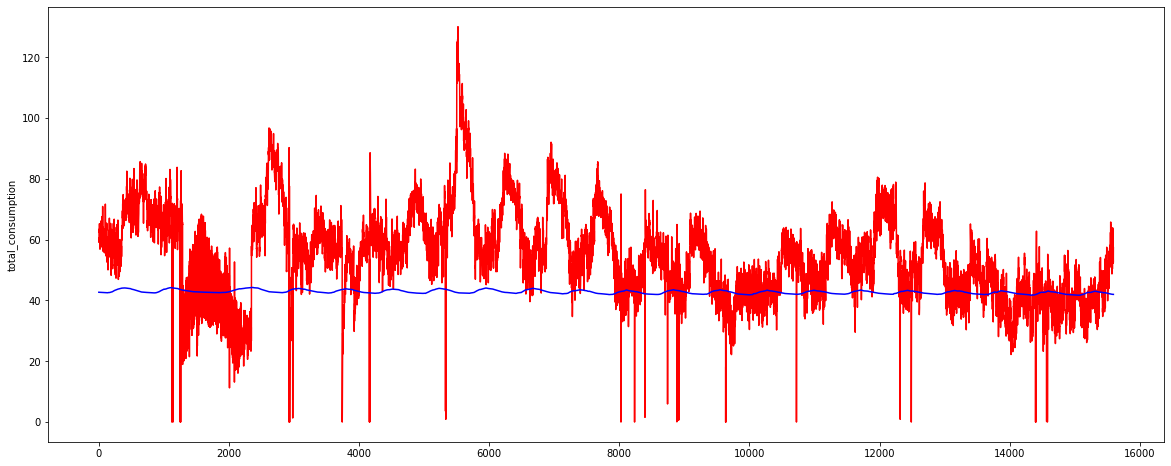

In [66]:
plt.figure(figsize=(20,8))
sns.lineplot(range(y_test.shape[0]),y_test.total_consumption,color = "red")
sns.lineplot(range(y_test.shape[0]),y_test.LR_prediction,color = "blue")
plt.show()

In [67]:
y_test.describe()

total_consumption  LR_prediction
count       15594.000000   15594.000000
mean           54.582298      42.816161
std            14.729136       0.583654
min             0.000000      41.690799
25%            43.968487      42.369896
50%            54.453838      42.734261
75%            63.396629      43.205793
max           130.064581      44.295506

## Random forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf = RandomForestRegressor(n_estimators=100,  criterion='mse', max_depth=10)

In [70]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
y_test['RF_prediction']= rf.predict(X_test_scaled)

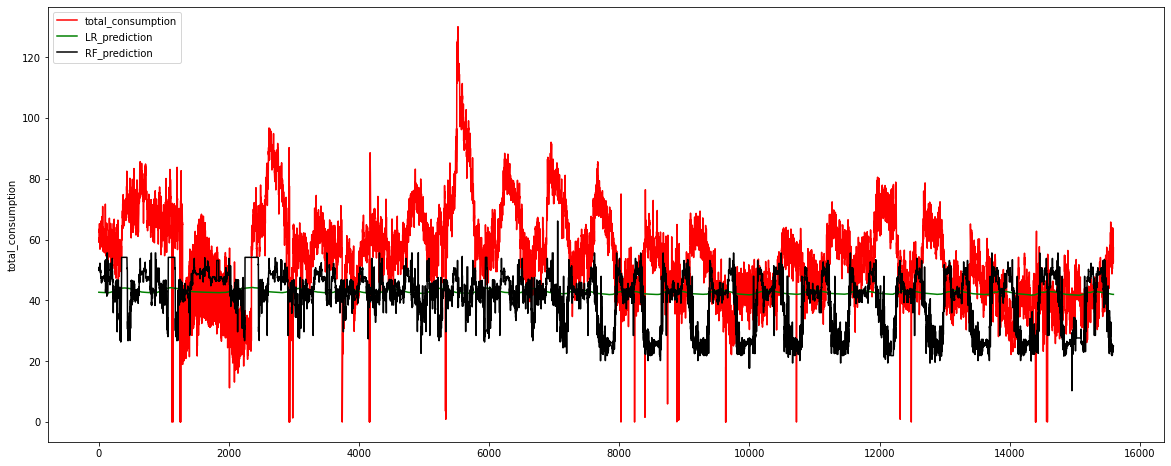

In [72]:
plt.figure(figsize=(20,8))
sns.lineplot(range(y_test.shape[0]),y_test.total_consumption,color = "red",label="total_consumption")
sns.lineplot(range(y_test.shape[0]),y_test.LR_prediction,color = "green",label="LR_prediction")
sns.lineplot(range(y_test.shape[0]),y_test.RF_prediction,color = "black",label="RF_prediction")
plt.legend(loc="upper left")
plt.show()


In [73]:
y_test['LR_dev']= np.where(y_test.total_consumption == 0,0,(np.abs((y_test.total_consumption - y_test.LR_prediction) / y_test.total_consumption)) * 100)
y_test['RF_dev']= np.where(y_test.total_consumption == 0,0,(np.abs((y_test.total_consumption - y_test.RF_prediction) / y_test.total_consumption)) * 100)

In [74]:
print("MAPE for Linear Regression is :",np.mean(y_test.LR_dev))

print("MAPE for Random Forest is :",np.mean(y_test.RF_dev) )

MAPE for Linear Regression is : 32.978646346911106
MAPE for Random Forest is : 39.07049468976376


In [75]:
y_test.head(2)

total_consumption  LR_prediction  RF_prediction     LR_dev     RF_dev
36385          60.390588      42.695746      50.655036  29.300662  16.120975
36386          59.138258      42.694295      50.391272  27.805964  14.790740

In [76]:
bias = np.sum(y_test.total_consumption)/np.sum(y_test.RF_prediction)

In [77]:
df= y_test.copy()

In [89]:
y_test = df

In [90]:
y_test['RF_prediction_bias_corrected']= rf.predict(X_test_scaled)*bias
y_test= y_test.iloc[-2000:-1,:]

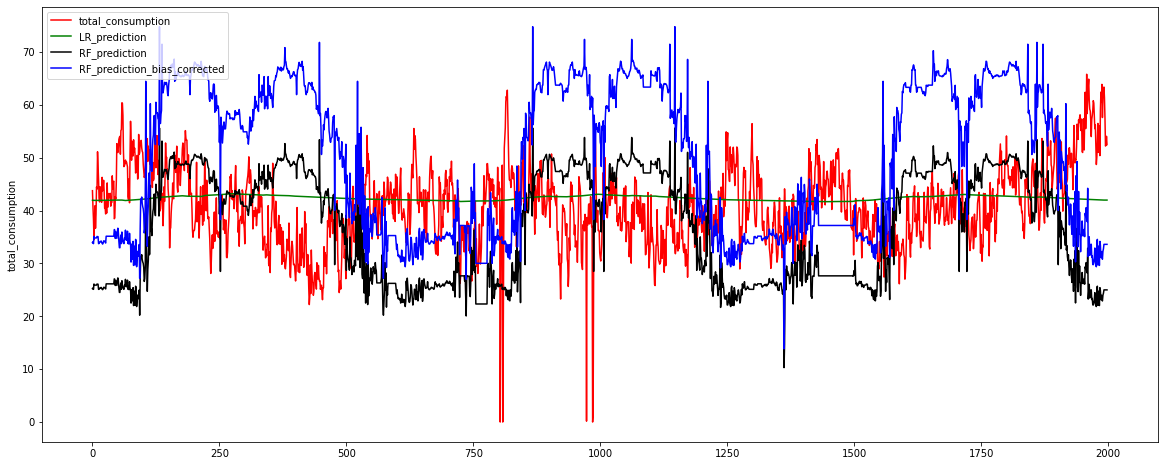

In [91]:
plt.figure(figsize=(20,8))
sns.lineplot(range(y_test.shape[0]),y_test.total_consumption,color = "red",label="total_consumption")
sns.lineplot(range(y_test.shape[0]),y_test.LR_prediction,color = "green",label="LR_prediction")
sns.lineplot(range(y_test.shape[0]),y_test.RF_prediction,color = "black",label="RF_prediction")
sns.lineplot(range(y_test.shape[0]),y_test.RF_prediction_bias_corrected,color = "blue",label="RF_prediction_bias_corrected")
plt.legend(loc="upper left")
plt.show()


In [85]:
y_test['RF_bias_corrected_dev']= np.where(y_test.total_consumption == 0,0,(np.abs((y_test.total_consumption - y_test.RF_prediction_bias_corrected) / y_test.total_consumption)) * 100)

In [87]:
print("MAPE for Linear Regression is :",np.mean(y_test.LR_dev))
print("MAPE for Random Forest is :",np.mean(y_test.RF_dev) )
print("MAPE for Bias corrected Random Forest is :",np.mean(y_test.RF_bias_corrected_dev) )

MAPE for Linear Regression is : 14.47247718271214
MAPE for Random Forest is : 27.67510846260808
MAPE for Bias corrected Random Forest is : 39.576992902542464


Using Linear Regression and Random forest we built a fast model but the MAPE is still very high. As visible from the plot above out models did not do a very good job. The bias corrected forecast also performed worse.

## Triple exponential smoothing a.k.a. Holt-Winters



In [92]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [93]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [94]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_log_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [95]:
%%time
data = merged_df.total_consumption[:-7200] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.0004641151357867579 0.0003024706001933386 0.005553375627623869
CPU times: user 4min 11s, sys: 1.06 s, total: 4min 12s
Wall time: 4min 12s


In [99]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    y = pd.DataFrame()
    y['LR_dev']=np.where(y_test.total_consumption == 0,0,(np.abs((y_test.total_consumption - y_test.LR_prediction) / y_test.total_consumption)) * 100)
    
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(np.mean(y_test.LR_dev)))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

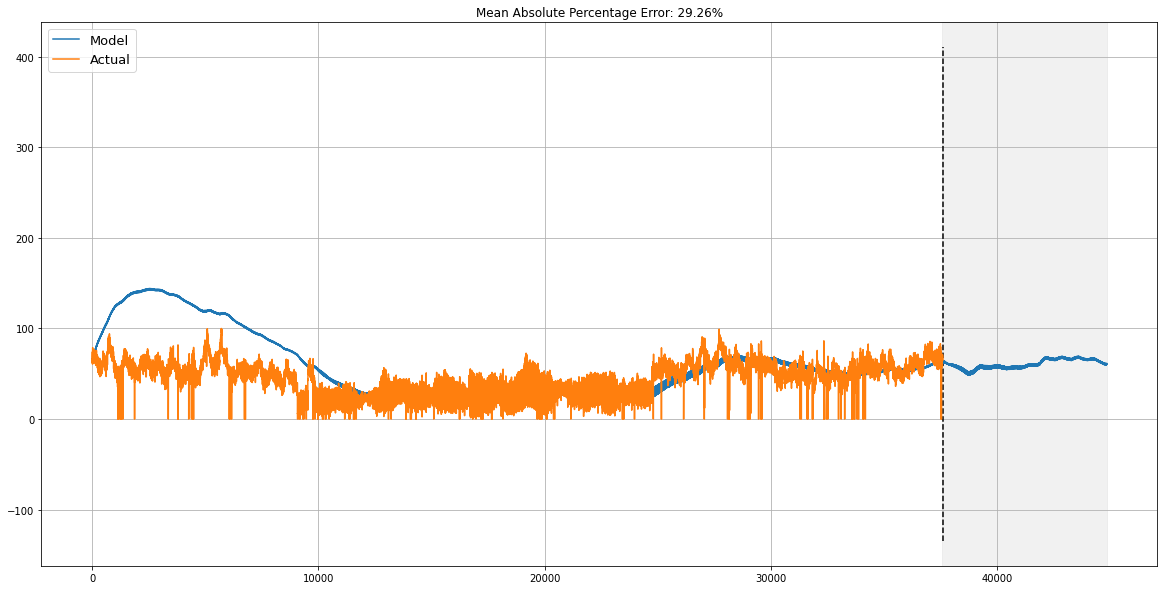

In [109]:
plotHoltWinters(merged_df.total_consumption[:-14400])

In [103]:
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

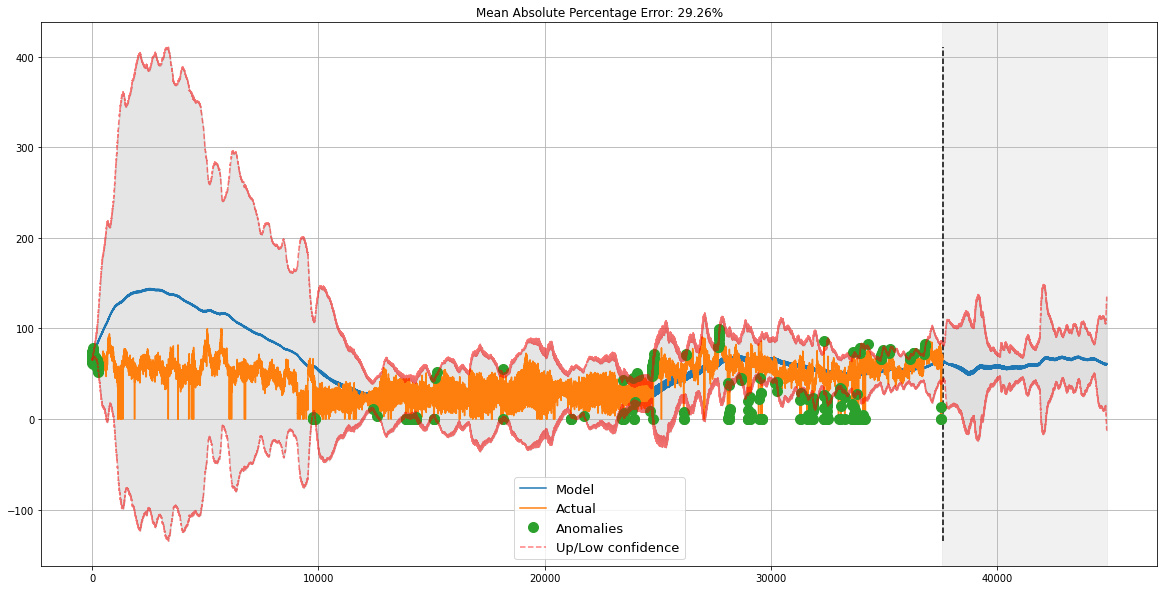

In [106]:
plotHoltWinters(merged_df.total_consumption[:-14400], plot_intervals=True, plot_anomalies=True)

Our MAPE is 29.6 which is better than the MAPE obtained from Linear Regression and Random forest.